In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import HTML
import matplotlib.pyplot as plt
import matplotlib.animation as animation



In [ ]:

# Load an image from file
image = cv2.imread('./assets/undestorted/eastbound/eastbound_20240319_254.png')

# Check if the image was loaded successfully
if image is None:
    print("Error: Unable to load image")
else:
    # Display the image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    kernel_size = 31

    blurred = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)
    
    # Apply Gaussian blur to reduce noise
    # blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Apply Canny edge detection

    # Display the original image and the detected edges
    resize_normal = cv2.resize(blurred, (0, 0), fx=0.5, fy=0.5)

    # equalized_image = cv2.equalizeHist(resize_normal)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    equalized_image = clahe.apply(resize_normal)

    

    edges = cv2.Canny(equalized_image, 20, 50)  # You can adjust the threshold values

    

    height, _ = edges.shape
    mask = np.zeros_like(edges)
    mask[int(height/2):, :] = 255

    edges_lower_half = cv2.bitwise_and(edges, edges, mask=mask)
    

    resized_image = cv2.resize(edges_lower_half, (0, 0), fx=0.5, fy=0.5)
    cv2.imshow('Original Image', image)
    cv2.imshow('normal', equalized_image)
    cv2.imshow('Edges', resized_image)
    cv2.waitKey(0)  # Wait for any key press
    cv2.destroyAllWindows()  # Close all OpenCV windows




In [17]:

folder_path = './assets/undistorted_05/eastbound'


files = os.listdir(folder_path)

def getNumber(x):
    num_w_ext = x.split('_')[2]
    num = num_w_ext.split('.')[0]
    return num

sorted_files = sorted(files, key=lambda x: int(getNumber(x)))
sorted_files = sorted_files[100:110]

# print(sorted_files)

points = [(1044, 784), (1439, 800), (1687, 1131), (229, 1034)]

matrix = [[-2.55742823e-01, -2.45586077e+00,  2.03742378e+03], [ 9.30304363e-02, -2.62394313e+00,  1.80508106e+03], [ 4.87713313e-05, -1.54852038e-03,  1.00000000e+00]]

matrix = np.float32(matrix)

normal_images = []
transformed_images = []

for img_source in sorted_files:
    print(img_source)
    image = cv2.imread(f"{folder_path}/{img_source}")

    transformed_image = cv2.warpPerspective(image, matrix, (image.shape[1], image.shape[0]))

    normal_images.append(image)
    transformed_images.append(transformed_image)






eastbound_20240319_08316.png
eastbound_20240319_08321.png
eastbound_20240319_08326.png
eastbound_20240319_08331.png
eastbound_20240319_08336.png
eastbound_20240319_08341.png
eastbound_20240319_08346.png
eastbound_20240319_08351.png
eastbound_20240319_08356.png
eastbound_20240319_08361.png


[[347.496337890625, 822.2078247070312, 2.446425437927246], [285.0106506347656, 795.8399047851562, 1.156826138496399], [405.9506530761719, 797.8681640625, 0.7569616436958313], [355.5589599609375, 432.7732849121094, 1.65677809715271], [377.7313232421875, 6.829229831695557, 0.7979896068572998]]


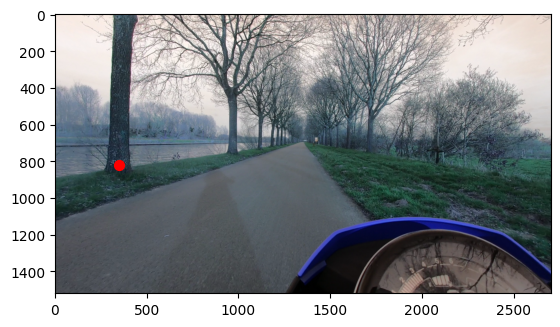

In [15]:
import json

path = "./assets/annotated_05/eastbound/"
name = sorted_files[0].replace('png', 'json')

with open(path + name, 'r') as json_file:
    # Load the JSON data
    data = json.load(json_file)

# Now 'data' contains the parsed JSON data
print(data["pred_keypoints"][0])

x = data["pred_keypoints"][0][0][0]
y = data["pred_keypoints"][0][0][1]

plt.imshow(normal_images[0])
plt.scatter(x, y, color='red', s=50)

<Figure size 640x480 with 0 Axes>

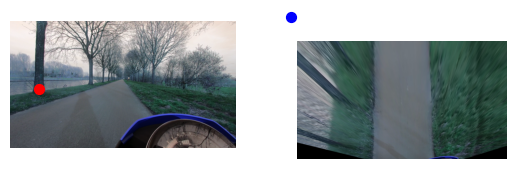

In [22]:
plt.clf()

fig, (ax1, ax2) = plt.subplots(1, 2)

path = "./assets/annotated_05/eastbound/"


# Function to update the image for video 2
def update(frame):
    ax1.clear()
    ax2.clear()

    name = sorted_files[frame].replace('png', 'json')

    with open(path + name, 'r') as json_file:
    # Load the JSON data
        data = json.load(json_file)

    x = data["pred_keypoints"][0][0][0]
    y = data["pred_keypoints"][0][0][1]
    z = data["pred_keypoints"][0][0][2]

# plt.imshow(normal_images[0])

    # Define the point you want to transform
    point = np.array([x, y, 1])  # Example point at (50, 50)

    # Apply the transformation by multiplying the point by the transformation matrix
    transformed_point = np.dot(matrix, point)


    ax1.imshow(normal_images[frame])
    ax2.imshow(transformed_images[frame])  # Display the current frame for video 2
    ax2.axis('off')  # Hide axes
    ax1.axis('off')  # Hide axes
    ax1.scatter(x, y, color='red', s=50)
    ax2.scatter(transformed_point[0], transformed_point[1], color='blue', s=50)
    return ax1, ax2

# Create animations for both subplots
ani = animation.FuncAnimation(fig, update, frames=len(normal_images), interval=100)

HTML(ani.to_jshtml())

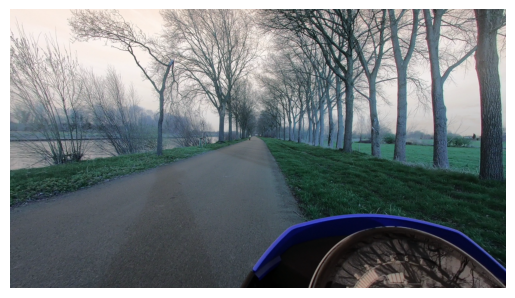

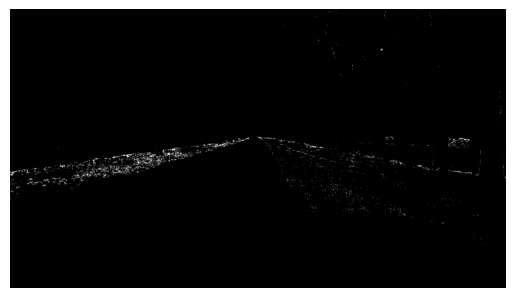

In [8]:
image = cv2.imread('./assets/undestorted/eastbound/eastbound_20240319_254.png')
# ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

hsv_img = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)



light = (60, 75, 85)
dark = (90, 100, 100)

mask = cv2.inRange(hsv_img, light, dark)

test = cv2.bitwise_and(image, image, mask=mask)

plt.imshow(image, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()

plt.imshow(mask, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()

In [ ]:
img = "./assets/annotated_05/eastbound/eastbound_20240319_08806.png"

